# Proyecto (borrador)

#### Estado actual del proyecto:
* Pruebas preliminares usando un dataset de alimentos.
* El dataset se creo descargando imágenes de [Walmart Costa Rica](https://walmart.co.cr/) y [Walmart](https://www.walmart.com/).
* Las imágenes se reducen en tamaño (resize) para ahorrar recursos computacionales.
* Se está usando una CNN.
* El rendimiento de la CNN de momento no es buena. Quizás tenga que ver con el cambio de tamaño de las imágenes (resize). O quizás se ocupan más EPOCHs
* Para hacer el TEST solo se estan usando 5 imágenes de momento.
* Solo se estan usando las categorías del dataset con varias imágenes.
* Las imá

In [ ]:
# Importar librerías
from os import listdir
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras import backend
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [34]:
path = "Datasets/Food Dataset/"
categories = ["cans","oil","sauce & dips","snack","syrup & jams"]
samples,rows,columns,channels = 189,128,128,3
Features = np.zeros((samples,rows,columns,channels))
Target = np.zeros(samples)
i = 0
for j,category in enumerate(categories):
    for filename in listdir(path+category):
        if filename.endswith(".bmp") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            image = keras.preprocessing.image.load_img(path+category+"/"+filename)
            image_array = keras.preprocessing.image.img_to_array(image)
            image_array = keras.preprocessing.image.smart_resize(image_array,(rows,columns),interpolation='bilinear')
            Features[i,:,:,:] = image_array
            Target[i] = j
            i += 1
        elif filename.endswith(".png"):
            pass

In [35]:
path = "Datasets/Food Dataset/train/"
samples = 5
Test = np.zeros((samples,rows,columns,channels))
i = 0
for filename in listdir(path):
    if filename.endswith(".bmp") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image = keras.preprocessing.image.load_img(path+filename)
        image_array = keras.preprocessing.image.img_to_array(image)
        image_array = keras.preprocessing.image.smart_resize(image_array,(rows,columns),interpolation='bilinear')
        Test[i,:,:,:] = image_array
        i += 1
Test_Target = [0,4,1,2,3]

In [36]:
Features = Features.astype('float32')
Features = Features/255
Test = Test.astype('float32')
Test = Test/255

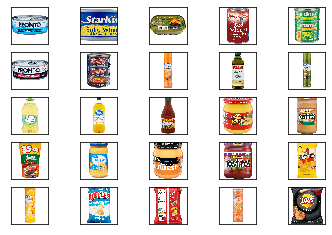

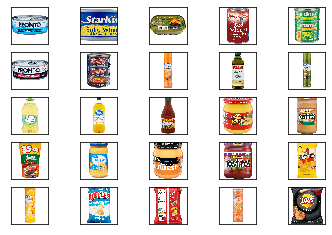

In [37]:
fig = plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Features[i*5],cmap='gray',interpolation='none')
    #plt.title("Digit: {}".format(Target[i*3]))
    plt.xticks([])
    plt.yticks([])
fig

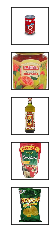

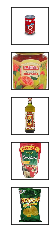

In [38]:
fig = plt.figure()
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.imshow(Test[i],cmap='gray',interpolation='none')
    plt.xticks([])
    plt.yticks([])
fig

In [39]:
#categories = ["cans","oil","sauce & dips","snack","syrup & jams"]
#[0,1,2,3,4]
print(Features.shape)
print(Target.shape)
print(np.unique(Target,return_counts=True))

(189, 128, 128, 3)
(189,)
(array([0., 1., 2., 3., 4.]), array([32, 25, 34, 80, 18]))


In [40]:
#set number of categories
num_category = 5
# convert class vectors to binary class matrices
Target = keras.utils.to_categorical(Target,num_category)
print(Target[0])
Test_Target = keras.utils.to_categorical(Test_Target,num_category)
print(Test_Target[0])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [41]:
input_shape = (rows,columns,channels)
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.summary()
#plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [42]:
X_train = Features 
y_train = Target
X_test = Test
y_test = Test_Target
import time
batch_size = 128
num_epoch = 10
#model training
start = time.time()
model_log = model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Training time: {m} min / {s} sec")

Epoch 1/10
2/2 [==============================] - 22s 10s/step - loss: 1.6808 - accuracy: 0.1237 - val_loss: 1.6457 - val_accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 13s 5s/step - loss: 1.6239 - accuracy: 0.1852 - val_loss: 1.6453 - val_accuracy: 0.2000
Epoch 3/10
2/2 [==============================] - 19s 8s/step - loss: 1.5652 - accuracy: 0.3123 - val_loss: 1.6402 - val_accuracy: 0.2000
Epoch 4/10
2/2 [==============================] - 11s 4s/step - loss: 1.5540 - accuracy: 0.3894 - val_loss: 1.6401 - val_accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 10s 3s/step - loss: 1.5531 - accuracy: 0.3799 - val_loss: 1.6385 - val_accuracy: 0.2000
Epoch 6/10
2/2 [==============================] - 10s 4s/step - loss: 1.5288 - accuracy: 0.4063 - val_loss: 1.6430 - val_accuracy: 0.2000
Epoch 7/10
2/2 [==============================] - 10s 4s/step - loss: 1.5224 - accuracy: 0.4037 - val_loss: 1.6438 - val_accuracy: 0.2000
Epoch 8/10
2/2 [=================

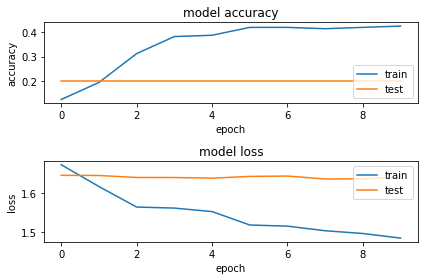

In [43]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

In [49]:
pred = model.predict(Test)
pred = np.argmax(pred, axis = 1)[:5]
print(pred)

[3 3 3 3 3]
